In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

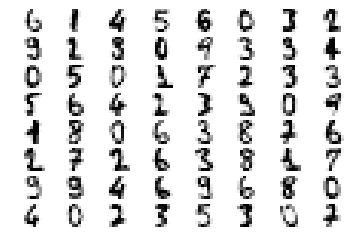

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1, class2):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("Class1:{} #class1:{}".format(class1,len(class1_label)))
    print("Class2:{} #class2:{}".format(class2,len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 67)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
#class1 = [0, 2, 4, 6, 8]
#winner1 = get_winner(class1)

In [7]:
winner_list = []

for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

Class1:0 #class1:162
Class2:1 #class2:163

 ****** Running generation 0 ****** 

Population's average fitness: 0.49678 stdev: 0.17608
Best fitness: 0.97538 - size: (2, 13) - species 1 - id 33
Average adjusted fitness: 0.447
Mean genetic distance 2.854, standard deviation 0.454
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 4.342 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57226 stdev: 0.17535
Best fitness: 0.97846 - size: (3, 15) - species 1 - id 366
Average adjusted fitness: 0.526
Mean genetic distance 2.948, standard deviation 0.475
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 4.943 sec (4.642 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62752 stdev: 0.19556
Best fitness: 0.97846 - size: (4, 15) - species 26 - id 480
Average adjusted fitness: 0.483
Mean genetic distance 3.025, standard deviation 0.468
Population of 202 members in 33 species
Total extinctio

Population's average fitness: 0.81516 stdev: 0.19069
Best fitness: 0.99692 - size: (6, 17) - species 5 - id 2284
Average adjusted fitness: 0.505
Mean genetic distance 3.355, standard deviation 0.504
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 4.559 sec (4.662 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.78862 stdev: 0.20539
Best fitness: 0.99692 - size: (6, 17) - species 5 - id 2284
Average adjusted fitness: 0.681
Mean genetic distance 3.343, standard deviation 0.499
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 4.517 sec (4.601 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.77752 stdev: 0.20330
Best fitness: 0.99692 - size: (6, 17) - species 5 - id 2284
Average adjusted fitness: 0.638
Mean genetic distance 3.340, standard deviation 0.492
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 4.714 sec (4.576 average)

 ****** Ru

Population's average fitness: 0.66713 stdev: 0.18624
Best fitness: 0.97833 - size: (2, 14) - species 6 - id 364
Average adjusted fitness: 0.348
Mean genetic distance 3.164, standard deviation 0.522
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 3.798 sec (3.556 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66362 stdev: 0.19512
Best fitness: 0.97833 - size: (2, 14) - species 6 - id 364
Average adjusted fitness: 0.611
Mean genetic distance 3.176, standard deviation 0.526
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 4.140 sec (3.654 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.70006 stdev: 0.19696
Best fitness: 0.97833 - size: (4, 16) - species 37 - id 1046
Average adjusted fitness: 0.447
Mean genetic distance 3.183, standard deviation 0.533
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 3.999 sec (3.703 average)

 ****** Runni

Mean genetic distance 2.965, standard deviation 0.502
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 3.383 sec (3.223 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64706 stdev: 0.19545
Best fitness: 0.98466 - size: (2, 13) - species 13 - id 345
Average adjusted fitness: 0.531
Mean genetic distance 2.995, standard deviation 0.513
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 3.615 sec (3.321 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.67495 stdev: 0.18386
Best fitness: 0.98773 - size: (3, 15) - species 13 - id 831
Average adjusted fitness: 0.466
Mean genetic distance 3.020, standard deviation 0.499
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 3.840 sec (3.425 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.67378 stdev: 0.18488
Best fitness: 0.99080 - size: (4, 18) - species 20 - id 978
Averag

Mean genetic distance 3.223, standard deviation 0.510
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 4.614 sec (4.394 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.77939 stdev: 0.19380
Best fitness: 0.99693 - size: (4, 19) - species 29 - id 3384
Average adjusted fitness: 0.408
Mean genetic distance 3.226, standard deviation 0.512
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 5.191 sec (4.484 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.79009 stdev: 0.20197
Best fitness: 0.99693 - size: (4, 19) - species 29 - id 3384
Average adjusted fitness: 0.755
Mean genetic distance 3.224, standard deviation 0.519
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 4.790 sec (4.536 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.79954 stdev: 0.18883
Best fitness: 0.99693 - size: (4, 19) - species 29 - id 3384


Population's average fitness: 0.79705 stdev: 0.20181
Best fitness: 0.99385 - size: (5, 18) - species 17 - id 2131
Average adjusted fitness: 0.473
Mean genetic distance 3.160, standard deviation 0.484
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 4.414 sec (4.071 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.82030 stdev: 0.19157
Best fitness: 0.99385 - size: (5, 18) - species 17 - id 2131
Average adjusted fitness: 0.782
Mean genetic distance 3.168, standard deviation 0.497
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 4.574 sec (4.148 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.80451 stdev: 0.19653
Best fitness: 0.99385 - size: (6, 21) - species 19 - id 2683
Average adjusted fitness: 0.564
Mean genetic distance 3.215, standard deviation 0.498
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 4.336 sec (4.203 average)

 ******


 ****** Running generation 0 ****** 

Population's average fitness: 0.50147 stdev: 0.13363
Best fitness: 0.90282 - size: (2, 13) - species 1 - id 23
Average adjusted fitness: 0.440
Mean genetic distance 2.913, standard deviation 0.476
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 3.058 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54299 stdev: 0.13968
Best fitness: 0.93417 - size: (2, 14) - species 4 - id 383
Average adjusted fitness: 0.449
Mean genetic distance 3.068, standard deviation 0.483
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 3.320 sec (3.189 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59979 stdev: 0.17990
Best fitness: 0.95298 - size: (3, 16) - species 18 - id 414
Average adjusted fitness: 0.550
Mean genetic distance 3.136, standard deviation 0.485
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 3.578 sec (3.319 av

Population's average fitness: 0.78848 stdev: 0.19079
Best fitness: 0.99373 - size: (9, 28) - species 45 - id 2616
Average adjusted fitness: 0.742
Mean genetic distance 3.249, standard deviation 0.484
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 4.237 sec (4.086 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.76938 stdev: 0.20538
Best fitness: 0.99373 - size: (9, 28) - species 45 - id 2616
Average adjusted fitness: 0.524
Mean genetic distance 3.243, standard deviation 0.492
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 4.365 sec (4.125 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.76302 stdev: 0.22372
Best fitness: 0.99373 - size: (9, 28) - species 45 - id 2616
Average adjusted fitness: 0.667
Mean genetic distance 3.244, standard deviation 0.491
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 4.152 sec (4.140 average)

 ******

Population's average fitness: 0.78954 stdev: 0.21386
Best fitness: 0.99687 - size: (8, 28) - species 28 - id 5179
Average adjusted fitness: 0.694
Mean genetic distance 3.376, standard deviation 0.584
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 4.782 sec (4.686 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.78763 stdev: 0.19576
Best fitness: 1.00000 - size: (9, 32) - species 28 - id 6813

Best individual in generation 49 meets fitness threshold - complexity: (9, 32)
Class1:0 #class1:162
Class2:9 #class2:162

 ****** Running generation 0 ****** 

Population's average fitness: 0.49662 stdev: 0.11985
Best fitness: 0.93210 - size: (2, 13) - species 5 - id 163
Average adjusted fitness: 0.457
Mean genetic distance 2.917, standard deviation 0.489
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 3.034 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55469 stdev: 0.14748
Bes

Population's average fitness: 0.63022 stdev: 0.14389
Best fitness: 0.90402 - size: (2, 13) - species 19 - id 26
Average adjusted fitness: 0.315
Mean genetic distance 3.088, standard deviation 0.484
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 3.332 sec (3.146 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63814 stdev: 0.14260
Best fitness: 0.91022 - size: (4, 17) - species 1 - id 776
Average adjusted fitness: 0.399
Mean genetic distance 3.095, standard deviation 0.496
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 4.114 sec (3.339 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63622 stdev: 0.16003
Best fitness: 0.92260 - size: (5, 20) - species 13 - id 916
Average adjusted fitness: 0.529
Mean genetic distance 3.100, standard deviation 0.508
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 4.231 sec (3.488 average)

 ****** Runnin

Population's average fitness: 0.73776 stdev: 0.17241
Best fitness: 0.95975 - size: (4, 15) - species 19 - id 3604
Average adjusted fitness: 0.603
Mean genetic distance 3.143, standard deviation 0.502
Population of 191 members in 29 species
Total extinctions: 0
Generation time: 4.331 sec (4.116 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.74367 stdev: 0.16683
Best fitness: 0.95975 - size: (4, 15) - species 19 - id 3604
Average adjusted fitness: 0.521
Mean genetic distance 3.128, standard deviation 0.512
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 4.043 sec (4.118 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.72470 stdev: 0.17128
Best fitness: 0.95975 - size: (4, 15) - species 19 - id 3604
Average adjusted fitness: 0.605
Mean genetic distance 3.091, standard deviation 0.525
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 4.045 sec (4.121 average)

 ******

Population's average fitness: 0.75293 stdev: 0.16362
Best fitness: 0.97523 - size: (9, 26) - species 36 - id 5049
Average adjusted fitness: 0.342
Mean genetic distance 3.243, standard deviation 0.594
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 4.568 sec (4.641 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.73525 stdev: 0.17583
Best fitness: 0.97523 - size: (9, 26) - species 36 - id 5049
Average adjusted fitness: 0.465
Mean genetic distance 3.203, standard deviation 0.608
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 4.697 sec (4.642 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.73060 stdev: 0.17815
Best fitness: 0.97523 - size: (9, 26) - species 36 - id 5049
Average adjusted fitness: 0.430
Mean genetic distance 3.217, standard deviation 0.596
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 4.891 sec (4.667 average)

 ******

Population's average fitness: 0.71123 stdev: 0.16168
Best fitness: 0.96646 - size: (6, 21) - species 2 - id 1422
Average adjusted fitness: 0.451
Mean genetic distance 3.152, standard deviation 0.499
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 3.868 sec (3.758 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.70131 stdev: 0.15940
Best fitness: 0.97866 - size: (7, 23) - species 26 - id 1516
Average adjusted fitness: 0.405
Mean genetic distance 3.142, standard deviation 0.507
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 3.946 sec (3.776 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.73195 stdev: 0.15830
Best fitness: 0.97866 - size: (7, 23) - species 26 - id 1516
Average adjusted fitness: 0.389
Mean genetic distance 3.129, standard deviation 0.513
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 3.887 sec (3.877 average)

 ****** R

Population's average fitness: 0.78433 stdev: 0.16873
Best fitness: 0.99085 - size: (8, 24) - species 26 - id 2478
Average adjusted fitness: 0.520
Mean genetic distance 3.327, standard deviation 0.526
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 4.737 sec (4.582 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.76788 stdev: 0.18442
Best fitness: 0.99085 - size: (8, 24) - species 26 - id 2478
Average adjusted fitness: 0.590
Mean genetic distance 3.305, standard deviation 0.537
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 4.555 sec (4.603 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.77219 stdev: 0.18604
Best fitness: 0.99085 - size: (8, 24) - species 26 - id 2478
Average adjusted fitness: 0.649
Mean genetic distance 3.343, standard deviation 0.535
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 4.684 sec (4.632 average)

 ******

Population's average fitness: 0.80322 stdev: 0.16854
Best fitness: 0.99390 - size: (11, 30) - species 35 - id 8052
Average adjusted fitness: 0.415
Mean genetic distance 3.297, standard deviation 0.584
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 5.285 sec (5.081 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.79464 stdev: 0.18081
Best fitness: 0.99390 - size: (11, 30) - species 35 - id 8052
Average adjusted fitness: 0.481
Mean genetic distance 3.271, standard deviation 0.578
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 5.121 sec (5.100 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.79555 stdev: 0.18543
Best fitness: 0.99390 - size: (11, 30) - species 35 - id 8052
Average adjusted fitness: 0.533
Mean genetic distance 3.281, standard deviation 0.572
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 5.429 sec (5.144 average)

 ***

Population's average fitness: 0.72386 stdev: 0.15625
Best fitness: 0.95679 - size: (3, 16) - species 5 - id 1450
Average adjusted fitness: 0.464
Mean genetic distance 3.109, standard deviation 0.488
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 3.816 sec (3.797 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.71978 stdev: 0.16055
Best fitness: 0.96914 - size: (7, 26) - species 6 - id 2248
Average adjusted fitness: 0.593
Mean genetic distance 3.106, standard deviation 0.483
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 3.940 sec (3.812 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.72437 stdev: 0.15398
Best fitness: 0.96914 - size: (7, 26) - species 6 - id 2248
Average adjusted fitness: 0.494
Mean genetic distance 3.123, standard deviation 0.491
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 4.117 sec (3.857 average)

 ****** Ru

Population's average fitness: 0.75286 stdev: 0.15503
Best fitness: 0.98148 - size: (8, 31) - species 6 - id 4632
Average adjusted fitness: 0.290
Mean genetic distance 3.176, standard deviation 0.553
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 4.520 sec (4.409 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.72693 stdev: 0.15805
Best fitness: 0.98148 - size: (8, 31) - species 6 - id 4632
Average adjusted fitness: 0.277
Mean genetic distance 3.200, standard deviation 0.561
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 4.367 sec (4.380 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.73284 stdev: 0.15641
Best fitness: 0.98148 - size: (8, 31) - species 6 - id 4632
Average adjusted fitness: 0.245
Mean genetic distance 3.221, standard deviation 0.568
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 4.610 sec (4.392 average)

 ****** Ru

Population's average fitness: 0.72617 stdev: 0.16982
Best fitness: 0.99074 - size: (9, 28) - species 23 - id 7512
Average adjusted fitness: 0.555
Mean genetic distance 3.316, standard deviation 0.603
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 5.134 sec (5.199 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.71755 stdev: 0.17135
Best fitness: 0.99074 - size: (9, 28) - species 23 - id 7512
Average adjusted fitness: 0.356
Mean genetic distance 3.318, standard deviation 0.583
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 5.289 sec (5.218 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.72455 stdev: 0.16874
Best fitness: 0.99074 - size: (9, 28) - species 23 - id 7512
Average adjusted fitness: 0.331
Mean genetic distance 3.349, standard deviation 0.614
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 5.396 sec (5.234 average)

 ******

Population's average fitness: 0.73214 stdev: 0.16194
Best fitness: 0.96330 - size: (7, 21) - species 12 - id 1855
Average adjusted fitness: 0.366
Mean genetic distance 3.174, standard deviation 0.483
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 3.971 sec (3.861 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.73342 stdev: 0.16422
Best fitness: 0.96330 - size: (7, 21) - species 12 - id 1855
Average adjusted fitness: 0.553
Mean genetic distance 3.171, standard deviation 0.487
Population of 191 members in 31 species
Total extinctions: 0
Generation time: 4.088 sec (3.901 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.72269 stdev: 0.17056
Best fitness: 0.96330 - size: (7, 21) - species 12 - id 1855
Average adjusted fitness: 0.457
Mean genetic distance 3.179, standard deviation 0.474
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 4.023 sec (3.926 average)

 ******

Population's average fitness: 0.72853 stdev: 0.17293
Best fitness: 0.98471 - size: (5, 19) - species 16 - id 3063
Average adjusted fitness: 0.593
Mean genetic distance 3.305, standard deviation 0.559
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 4.983 sec (4.825 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.75232 stdev: 0.17247
Best fitness: 0.98777 - size: (6, 20) - species 16 - id 6282
Average adjusted fitness: 0.489
Mean genetic distance 3.301, standard deviation 0.549
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 5.090 sec (4.890 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.72977 stdev: 0.17826
Best fitness: 0.98777 - size: (6, 20) - species 16 - id 6282
Average adjusted fitness: 0.424
Mean genetic distance 3.312, standard deviation 0.539
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 5.366 sec (4.973 average)

 ******

Population's average fitness: 0.76393 stdev: 0.17519
Best fitness: 0.98777 - size: (13, 35) - species 29 - id 8643
Average adjusted fitness: 0.607
Mean genetic distance 3.155, standard deviation 0.550
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 6.124 sec (5.762 average)
Class1:1 #class1:163
Class2:6 #class2:163

 ****** Running generation 0 ****** 

Population's average fitness: 0.51267 stdev: 0.13588
Best fitness: 0.88957 - size: (2, 13) - species 7 - id 164
Average adjusted fitness: 0.367
Mean genetic distance 2.942, standard deviation 0.497
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 2.946 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57250 stdev: 0.16815
Best fitness: 0.92025 - size: (3, 15) - species 20 - id 341
Average adjusted fitness: 0.481
Mean genetic distance 3.025, standard deviation 0.511
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 3.201 sec (3

Population's average fitness: 0.77072 stdev: 0.18001
Best fitness: 0.99693 - size: (4, 19) - species 30 - id 936
Average adjusted fitness: 0.592
Mean genetic distance 3.249, standard deviation 0.494
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 4.079 sec (4.020 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.75373 stdev: 0.19150
Best fitness: 0.99693 - size: (4, 19) - species 30 - id 936
Average adjusted fitness: 0.673
Mean genetic distance 3.237, standard deviation 0.495
Population of 190 members in 29 species
Total extinctions: 0
Generation time: 3.890 sec (4.009 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.75436 stdev: 0.17662
Best fitness: 0.99693 - size: (4, 19) - species 30 - id 936
Average adjusted fitness: 0.448
Mean genetic distance 3.215, standard deviation 0.504
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 4.022 sec (4.013 average)

 ****** Ru

Population's average fitness: 0.74044 stdev: 0.19229
Best fitness: 0.99693 - size: (4, 19) - species 30 - id 936
Average adjusted fitness: 0.418
Mean genetic distance 3.224, standard deviation 0.575
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 4.803 sec (4.505 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.76276 stdev: 0.18997
Best fitness: 0.99693 - size: (4, 19) - species 30 - id 936
Average adjusted fitness: 0.685
Mean genetic distance 3.235, standard deviation 0.571
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 4.801 sec (4.564 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.71018 stdev: 0.19809
Best fitness: 0.99693 - size: (4, 19) - species 30 - id 936
Average adjusted fitness: 0.693
Mean genetic distance 3.187, standard deviation 0.576
Population of 203 members in 20 species
Total extinctions: 0
Generation time: 4.771 sec (4.600 average)

 ****** Ru

Population's average fitness: 0.62759 stdev: 0.14576
Best fitness: 0.95975 - size: (2, 13) - species 26 - id 4
Average adjusted fitness: 0.338
Mean genetic distance 3.090, standard deviation 0.482
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 3.606 sec (3.472 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65628 stdev: 0.15371
Best fitness: 0.95975 - size: (2, 13) - species 26 - id 4
Average adjusted fitness: 0.453
Mean genetic distance 3.102, standard deviation 0.479
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 3.578 sec (3.490 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.66124 stdev: 0.16646
Best fitness: 0.96285 - size: (5, 16) - species 29 - id 1059
Average adjusted fitness: 0.488
Mean genetic distance 3.098, standard deviation 0.475
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 4.023 sec (3.566 average)

 ****** Running

Population's average fitness: 0.73356 stdev: 0.17277
Best fitness: 0.99071 - size: (5, 21) - species 5 - id 3877
Average adjusted fitness: 0.458
Mean genetic distance 3.266, standard deviation 0.511
Population of 206 members in 26 species
Total extinctions: 0
Generation time: 4.388 sec (4.215 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.73077 stdev: 0.16226
Best fitness: 0.99071 - size: (5, 21) - species 5 - id 3877
Average adjusted fitness: 0.570
Mean genetic distance 3.292, standard deviation 0.515
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 4.724 sec (4.275 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.73792 stdev: 0.17579
Best fitness: 0.99071 - size: (5, 21) - species 5 - id 3877
Average adjusted fitness: 0.554
Mean genetic distance 3.299, standard deviation 0.505
Population of 192 members in 26 species
Total extinctions: 0
Generation time: 4.400 sec (4.323 average)

 ****** Ru

Population's average fitness: 0.73046 stdev: 0.18575
Best fitness: 0.99381 - size: (7, 25) - species 5 - id 7721
Average adjusted fitness: 0.550
Mean genetic distance 3.277, standard deviation 0.641
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 5.147 sec (5.001 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.74936 stdev: 0.17460
Best fitness: 0.99381 - size: (7, 25) - species 5 - id 7721
Average adjusted fitness: 0.502
Mean genetic distance 3.274, standard deviation 0.623
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 5.234 sec (5.062 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.75875 stdev: 0.17234
Best fitness: 0.99381 - size: (7, 25) - species 5 - id 7721
Average adjusted fitness: 0.367
Mean genetic distance 3.333, standard deviation 0.594
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 5.145 sec (5.098 average)

 ****** Ru

Population's average fitness: 0.62915 stdev: 0.12139
Best fitness: 0.88125 - size: (5, 20) - species 26 - id 1550
Average adjusted fitness: 0.322
Mean genetic distance 3.110, standard deviation 0.493
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 3.697 sec (3.464 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63519 stdev: 0.12182
Best fitness: 0.88125 - size: (5, 20) - species 26 - id 1550
Average adjusted fitness: 0.347
Mean genetic distance 3.089, standard deviation 0.490
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 3.576 sec (3.468 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64150 stdev: 0.12372
Best fitness: 0.88125 - size: (5, 20) - species 26 - id 1550
Average adjusted fitness: 0.407
Mean genetic distance 3.102, standard deviation 0.487
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 3.701 sec (3.509 average)

 ******

Population's average fitness: 0.65647 stdev: 0.13335
Best fitness: 0.88438 - size: (5, 21) - species 26 - id 2802
Average adjusted fitness: 0.287
Mean genetic distance 3.200, standard deviation 0.518
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 4.423 sec (4.269 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.66021 stdev: 0.14590
Best fitness: 0.88438 - size: (6, 21) - species 14 - id 5100
Average adjusted fitness: 0.433
Mean genetic distance 3.174, standard deviation 0.532
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 4.336 sec (4.280 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.66184 stdev: 0.13826
Best fitness: 0.88438 - size: (6, 21) - species 14 - id 5100
Average adjusted fitness: 0.456
Mean genetic distance 3.187, standard deviation 0.535
Population of 194 members in 23 species
Total extinctions: 0
Generation time: 4.241 sec (4.298 average)

 ******

Population's average fitness: 0.63844 stdev: 0.14391
Best fitness: 0.91563 - size: (10, 29) - species 11 - id 7790
Average adjusted fitness: 0.384
Mean genetic distance 3.158, standard deviation 0.555
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 4.579 sec (4.647 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.66352 stdev: 0.14276
Best fitness: 0.91563 - size: (10, 29) - species 11 - id 7790
Average adjusted fitness: 0.466
Mean genetic distance 3.180, standard deviation 0.558
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 4.682 sec (4.658 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.67307 stdev: 0.14794
Best fitness: 0.91563 - size: (10, 29) - species 11 - id 7790
Average adjusted fitness: 0.379
Mean genetic distance 3.241, standard deviation 0.576
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 4.841 sec (4.672 average)

 ***

Population's average fitness: 0.68442 stdev: 0.16083
Best fitness: 0.95077 - size: (5, 21) - species 24 - id 1136
Average adjusted fitness: 0.401
Mean genetic distance 3.062, standard deviation 0.479
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 3.871 sec (3.773 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.69482 stdev: 0.15248
Best fitness: 0.95077 - size: (5, 21) - species 24 - id 1136
Average adjusted fitness: 0.476
Mean genetic distance 3.096, standard deviation 0.490
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 4.178 sec (3.756 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.70210 stdev: 0.16080
Best fitness: 0.95077 - size: (5, 21) - species 24 - id 1136
Average adjusted fitness: 0.406
Mean genetic distance 3.124, standard deviation 0.482
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 4.005 sec (3.790 average)

 ******

Population's average fitness: 0.73492 stdev: 0.16016
Best fitness: 0.95077 - size: (5, 21) - species 24 - id 1136
Average adjusted fitness: 0.498
Mean genetic distance 3.237, standard deviation 0.529
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 4.545 sec (4.425 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.75265 stdev: 0.14771
Best fitness: 0.95077 - size: (5, 21) - species 24 - id 1136
Average adjusted fitness: 0.323
Mean genetic distance 3.250, standard deviation 0.524
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 4.591 sec (4.441 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.73583 stdev: 0.16284
Best fitness: 0.95077 - size: (5, 21) - species 24 - id 1136
Average adjusted fitness: 0.440
Mean genetic distance 3.254, standard deviation 0.523
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 4.467 sec (4.435 average)

 ******

Population's average fitness: 0.75097 stdev: 0.15429
Best fitness: 0.95692 - size: (8, 26) - species 26 - id 8648
Average adjusted fitness: 0.331
Mean genetic distance 3.316, standard deviation 0.592
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 4.868 sec (4.797 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.73869 stdev: 0.16614
Best fitness: 0.95692 - size: (8, 26) - species 26 - id 8648
Average adjusted fitness: 0.519
Mean genetic distance 3.290, standard deviation 0.585
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 4.849 sec (4.817 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.74060 stdev: 0.15906
Best fitness: 0.95692 - size: (8, 26) - species 26 - id 8648
Average adjusted fitness: 0.504
Mean genetic distance 3.263, standard deviation 0.581
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 4.864 sec (4.845 average)

 ******

Population's average fitness: 0.72159 stdev: 0.16906
Best fitness: 0.96000 - size: (6, 19) - species 37 - id 1521
Average adjusted fitness: 0.461
Mean genetic distance 3.267, standard deviation 0.464
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 4.173 sec (4.066 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.71738 stdev: 0.18011
Best fitness: 0.96000 - size: (6, 19) - species 37 - id 1521
Average adjusted fitness: 0.497
Mean genetic distance 3.277, standard deviation 0.481
Population of 192 members in 40 species
Total extinctions: 0
Generation time: 4.115 sec (3.968 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.71561 stdev: 0.17146
Best fitness: 0.96000 - size: (6, 19) - species 37 - id 1521
Average adjusted fitness: 0.399
Mean genetic distance 3.262, standard deviation 0.489
Population of 190 members in 38 species
Total extinctions: 0
Generation time: 3.971 sec (3.978 average)

 ******

Population's average fitness: 0.74357 stdev: 0.17808
Best fitness: 0.96615 - size: (8, 27) - species 44 - id 5690
Average adjusted fitness: 0.413
Mean genetic distance 3.424, standard deviation 0.505
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 4.527 sec (4.535 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.75339 stdev: 0.17415
Best fitness: 0.96615 - size: (8, 27) - species 44 - id 5690
Average adjusted fitness: 0.438
Mean genetic distance 3.408, standard deviation 0.503
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 4.535 sec (4.549 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.75989 stdev: 0.17497
Best fitness: 0.96615 - size: (8, 27) - species 44 - id 5690
Average adjusted fitness: 0.517
Mean genetic distance 3.409, standard deviation 0.514
Population of 196 members in 25 species
Total extinctions: 0
Generation time: 4.622 sec (4.568 average)

 ******

Population's average fitness: 0.50374 stdev: 0.17801
Best fitness: 0.93146 - size: (2, 13) - species 5 - id 33
Average adjusted fitness: 0.470
Mean genetic distance 2.951, standard deviation 0.486
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 2.859 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59965 stdev: 0.16903
Best fitness: 0.94393 - size: (3, 15) - species 4 - id 230
Average adjusted fitness: 0.502
Mean genetic distance 3.006, standard deviation 0.482
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 3.309 sec (3.084 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63453 stdev: 0.18012
Best fitness: 0.97508 - size: (4, 17) - species 4 - id 517
Average adjusted fitness: 0.523
Mean genetic distance 2.968, standard deviation 0.491
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 3.452 sec (3.207 average)

 ****** Running generation 3 ***

Population's average fitness: 0.78394 stdev: 0.19838
Best fitness: 0.99688 - size: (6, 20) - species 13 - id 2842
Average adjusted fitness: 0.555
Mean genetic distance 3.273, standard deviation 0.524
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 4.371 sec (4.261 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.79845 stdev: 0.19738
Best fitness: 0.99688 - size: (6, 20) - species 13 - id 2842
Average adjusted fitness: 0.600
Mean genetic distance 3.285, standard deviation 0.520
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 4.374 sec (4.265 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.82729 stdev: 0.17480
Best fitness: 0.99688 - size: (6, 20) - species 13 - id 2842
Average adjusted fitness: 0.651
Mean genetic distance 3.289, standard deviation 0.520
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 4.618 sec (4.316 average)

 ******

Population's average fitness: 0.80560 stdev: 0.19939
Best fitness: 0.99688 - size: (10, 30) - species 45 - id 6841
Average adjusted fitness: 0.673
Mean genetic distance 3.329, standard deviation 0.580
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 4.649 sec (4.669 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.79405 stdev: 0.20512
Best fitness: 0.99688 - size: (10, 30) - species 45 - id 6841
Average adjusted fitness: 0.679
Mean genetic distance 3.319, standard deviation 0.557
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 4.719 sec (4.678 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.80567 stdev: 0.19562
Best fitness: 0.99688 - size: (10, 30) - species 45 - id 6841
Average adjusted fitness: 0.664
Mean genetic distance 3.312, standard deviation 0.568
Population of 205 members in 19 species
Total extinctions: 0
Generation time: 4.968 sec (4.704 average)

 ***

Mean genetic distance 3.180, standard deviation 0.509
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 3.829 sec (3.783 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.73311 stdev: 0.17101
Best fitness: 0.98457 - size: (4, 19) - species 30 - id 2477
Average adjusted fitness: 0.493
Mean genetic distance 3.151, standard deviation 0.514
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 4.110 sec (3.837 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.74416 stdev: 0.17806
Best fitness: 0.98457 - size: (4, 19) - species 30 - id 2477
Average adjusted fitness: 0.611
Mean genetic distance 3.145, standard deviation 0.502
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 3.947 sec (3.859 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.76298 stdev: 0.17202
Best fitness: 0.98457 - size: (4, 19) - species 30 - id 2477


Mean genetic distance 3.172, standard deviation 0.552
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 4.668 sec (4.481 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.76358 stdev: 0.17976
Best fitness: 0.99074 - size: (10, 29) - species 23 - id 4111
Average adjusted fitness: 0.407
Mean genetic distance 3.120, standard deviation 0.555
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 4.498 sec (4.491 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.78235 stdev: 0.18307
Best fitness: 0.99074 - size: (10, 29) - species 23 - id 4111
Average adjusted fitness: 0.392
Mean genetic distance 3.135, standard deviation 0.551
Population of 205 members in 17 species
Total extinctions: 0
Generation time: 4.743 sec (4.516 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.75399 stdev: 0.18997
Best fitness: 0.99074 - size: (10, 29) - species 23 - id 41

Mean genetic distance 3.174, standard deviation 0.630
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 5.671 sec (5.461 average)
Class1:2 #class1:160
Class2:6 #class2:163

 ****** Running generation 0 ****** 

Population's average fitness: 0.49824 stdev: 0.15027
Best fitness: 0.95975 - size: (2, 13) - species 2 - id 16
Average adjusted fitness: 0.400
Mean genetic distance 2.888, standard deviation 0.482
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 2.995 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58412 stdev: 0.17219
Best fitness: 0.95975 - size: (2, 13) - species 2 - id 16
Average adjusted fitness: 0.479
Mean genetic distance 2.949, standard deviation 0.480
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 3.161 sec (3.078 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63284 stdev: 0.17681
Best fitness: 0.96594 - size: (3, 14) - spec

Population's average fitness: 0.64493 stdev: 0.17015
Best fitness: 0.96562 - size: (3, 15) - species 19 - id 356
Average adjusted fitness: 0.622
Mean genetic distance 3.098, standard deviation 0.477
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 3.400 sec (3.195 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.66322 stdev: 0.17017
Best fitness: 0.99687 - size: (4, 17) - species 29 - id 787
Average adjusted fitness: 0.540
Mean genetic distance 3.094, standard deviation 0.476
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 3.620 sec (3.280 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.68951 stdev: 0.18605
Best fitness: 0.99687 - size: (4, 17) - species 29 - id 787
Average adjusted fitness: 0.657
Mean genetic distance 3.134, standard deviation 0.493
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 3.546 sec (3.325 average)

 ****** Runn

Mean genetic distance 2.965, standard deviation 0.473
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 3.175 sec (3.026 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56601 stdev: 0.12447
Best fitness: 0.86120 - size: (3, 15) - species 6 - id 291
Average adjusted fitness: 0.295
Mean genetic distance 2.989, standard deviation 0.473
Population of 206 members in 29 species
Total extinctions: 0
Generation time: 3.245 sec (3.099 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60661 stdev: 0.12779
Best fitness: 0.86120 - size: (3, 15) - species 6 - id 291
Average adjusted fitness: 0.353
Mean genetic distance 3.019, standard deviation 0.489
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 3.448 sec (3.186 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62012 stdev: 0.13182
Best fitness: 0.88959 - size: (2, 14) - species 18 - id 782
Average 

Mean genetic distance 3.272, standard deviation 0.508
Population of 191 members in 27 species
Total extinctions: 0
Generation time: 4.137 sec (4.002 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.72433 stdev: 0.13918
Best fitness: 0.94006 - size: (4, 21) - species 38 - id 3447
Average adjusted fitness: 0.398
Mean genetic distance 3.273, standard deviation 0.512
Population of 192 members in 27 species
Total extinctions: 0
Generation time: 3.874 sec (4.005 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.72371 stdev: 0.13916
Best fitness: 0.94006 - size: (4, 21) - species 38 - id 3447
Average adjusted fitness: 0.309
Mean genetic distance 3.269, standard deviation 0.517
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 4.177 sec (4.015 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.72456 stdev: 0.14297
Best fitness: 0.94006 - size: (4, 21) - species 38 - id 3447


Mean genetic distance 3.256, standard deviation 0.590
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 4.848 sec (4.558 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.71739 stdev: 0.14773
Best fitness: 0.96845 - size: (13, 36) - species 31 - id 6742
Average adjusted fitness: 0.512
Mean genetic distance 3.239, standard deviation 0.619
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 4.829 sec (4.590 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.70358 stdev: 0.14960
Best fitness: 0.96845 - size: (13, 36) - species 31 - id 6742
Average adjusted fitness: 0.319
Mean genetic distance 3.221, standard deviation 0.611
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 5.136 sec (4.657 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.72992 stdev: 0.15375
Best fitness: 0.96845 - size: (13, 36) - species 31 - id 67

Mean genetic distance 3.150, standard deviation 0.511
Population of 210 members in 32 species
Total extinctions: 0
Generation time: 3.647 sec (3.400 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.70339 stdev: 0.16643
Best fitness: 0.95963 - size: (4, 16) - species 25 - id 1113
Average adjusted fitness: 0.461
Mean genetic distance 3.162, standard deviation 0.501
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 3.895 sec (3.462 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.71773 stdev: 0.16205
Best fitness: 0.95963 - size: (4, 16) - species 25 - id 1113
Average adjusted fitness: 0.308
Mean genetic distance 3.168, standard deviation 0.501
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 3.851 sec (3.505 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.71448 stdev: 0.16623
Best fitness: 0.95963 - size: (4, 16) - species 25 - id 1113
Ave

Mean genetic distance 3.225, standard deviation 0.496
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 4.263 sec (4.133 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.77187 stdev: 0.16935
Best fitness: 0.97205 - size: (5, 21) - species 25 - id 4435
Average adjusted fitness: 0.416
Mean genetic distance 3.222, standard deviation 0.501
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 4.302 sec (4.152 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.76030 stdev: 0.17529
Best fitness: 0.97205 - size: (5, 21) - species 25 - id 4435
Average adjusted fitness: 0.640
Mean genetic distance 3.245, standard deviation 0.500
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 4.381 sec (4.188 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.76447 stdev: 0.18066
Best fitness: 0.97205 - size: (5, 21) - species 25 - id 4435


Mean genetic distance 3.226, standard deviation 0.527
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 4.730 sec (4.707 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.73416 stdev: 0.18554
Best fitness: 0.98758 - size: (7, 26) - species 25 - id 6246
Average adjusted fitness: 0.654
Mean genetic distance 3.208, standard deviation 0.552
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 5.273 sec (4.772 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.73812 stdev: 0.18732
Best fitness: 0.98758 - size: (7, 26) - species 25 - id 6246
Average adjusted fitness: 0.573
Mean genetic distance 3.200, standard deviation 0.549
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 4.899 sec (4.813 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.76380 stdev: 0.17760
Best fitness: 0.98758 - size: (7, 26) - species 25 - id 6246


Population's average fitness: 0.67844 stdev: 0.17344
Best fitness: 0.98176 - size: (4, 16) - species 8 - id 555
Average adjusted fitness: 0.496
Mean genetic distance 3.116, standard deviation 0.498
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 3.873 sec (3.485 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.71615 stdev: 0.16385
Best fitness: 0.98176 - size: (4, 16) - species 8 - id 555
Average adjusted fitness: 0.495
Mean genetic distance 3.116, standard deviation 0.507
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 4.093 sec (3.561 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.71096 stdev: 0.17334
Best fitness: 0.98480 - size: (5, 21) - species 26 - id 1444
Average adjusted fitness: 0.496
Mean genetic distance 3.112, standard deviation 0.502
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 3.965 sec (3.606 average)

 ****** Runni

Population's average fitness: 0.74454 stdev: 0.18506
Best fitness: 0.98480 - size: (5, 21) - species 26 - id 1444
Average adjusted fitness: 0.505
Mean genetic distance 3.242, standard deviation 0.541
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 4.521 sec (4.295 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.75759 stdev: 0.17990
Best fitness: 0.98480 - size: (5, 21) - species 26 - id 1444
Average adjusted fitness: 0.487
Mean genetic distance 3.237, standard deviation 0.558
Population of 193 members in 23 species
Total extinctions: 0
Generation time: 4.439 sec (4.337 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.76897 stdev: 0.17899
Best fitness: 0.98480 - size: (5, 21) - species 26 - id 1444
Average adjusted fitness: 0.594
Mean genetic distance 3.263, standard deviation 0.533
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 4.631 sec (4.397 average)

 ******

Population's average fitness: 0.76726 stdev: 0.17351
Best fitness: 0.98480 - size: (12, 36) - species 44 - id 7089
Average adjusted fitness: 0.374
Mean genetic distance 3.157, standard deviation 0.568
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 4.868 sec (4.852 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.76223 stdev: 0.17958
Best fitness: 0.98480 - size: (12, 36) - species 50 - id 7089
Average adjusted fitness: 0.582
Mean genetic distance 3.135, standard deviation 0.570
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 5.067 sec (4.907 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.73821 stdev: 0.18220
Best fitness: 0.98480 - size: (5, 21) - species 26 - id 1444
Average adjusted fitness: 0.650
Mean genetic distance 3.120, standard deviation 0.575
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 4.870 sec (4.924 average)

 ****

Population's average fitness: 0.76230 stdev: 0.20444
Best fitness: 0.99085 - size: (5, 18) - species 12 - id 1460
Average adjusted fitness: 0.727
Mean genetic distance 3.080, standard deviation 0.484
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 3.986 sec (3.795 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.76762 stdev: 0.20356
Best fitness: 0.99085 - size: (5, 18) - species 12 - id 1460
Average adjusted fitness: 0.493
Mean genetic distance 3.083, standard deviation 0.484
Population of 191 members in 37 species
Total extinctions: 0
Generation time: 4.034 sec (3.858 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.79535 stdev: 0.19115
Best fitness: 0.99085 - size: (5, 18) - species 12 - id 1460
Average adjusted fitness: 0.669
Mean genetic distance 3.089, standard deviation 0.491
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 3.894 sec (3.889 average)

 ******

Population's average fitness: 0.74757 stdev: 0.21138
Best fitness: 0.99695 - size: (6, 21) - species 18 - id 4917
Average adjusted fitness: 0.572
Mean genetic distance 3.323, standard deviation 0.554
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 4.671 sec (4.683 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.78063 stdev: 0.19033
Best fitness: 0.99695 - size: (6, 21) - species 18 - id 4917
Average adjusted fitness: 0.623
Mean genetic distance 3.324, standard deviation 0.564
Population of 192 members in 19 species
Total extinctions: 0
Generation time: 4.582 sec (4.701 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.78824 stdev: 0.19792
Best fitness: 0.99695 - size: (6, 21) - species 18 - id 4917
Average adjusted fitness: 0.510
Mean genetic distance 3.279, standard deviation 0.606
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 4.642 sec (4.712 average)

 ******

Mean genetic distance 3.205, standard deviation 0.484
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 3.959 sec (4.026 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.75490 stdev: 0.19665
Best fitness: 0.98462 - size: (7, 22) - species 2 - id 1412
Average adjusted fitness: 0.679
Mean genetic distance 3.219, standard deviation 0.482
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 4.101 sec (4.052 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.75411 stdev: 0.18944
Best fitness: 0.98462 - size: (7, 22) - species 2 - id 1412
Average adjusted fitness: 0.579
Mean genetic distance 3.252, standard deviation 0.487
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 4.042 sec (4.064 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.77475 stdev: 0.18396
Best fitness: 0.98462 - size: (7, 22) - species 2 - id 1412
Ave

Mean genetic distance 3.276, standard deviation 0.557
Population of 204 members in 21 species
Total extinctions: 0
Generation time: 4.432 sec (4.361 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.76125 stdev: 0.19746
Best fitness: 0.98769 - size: (8, 25) - species 10 - id 5777
Average adjusted fitness: 0.599
Mean genetic distance 3.247, standard deviation 0.588
Population of 205 members in 19 species
Total extinctions: 0
Generation time: 4.566 sec (4.370 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.76684 stdev: 0.18404
Best fitness: 0.98769 - size: (8, 25) - species 10 - id 5777
Average adjusted fitness: 0.382
Mean genetic distance 3.238, standard deviation 0.573
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 4.613 sec (4.402 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.75300 stdev: 0.19859
Best fitness: 0.98769 - size: (8, 25) - species 10 - id 5777


Mean genetic distance 3.234, standard deviation 0.568
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 4.618 sec (4.733 average)
Class1:3 #class1:165
Class2:8 #class2:157

 ****** Running generation 0 ****** 

Population's average fitness: 0.49149 stdev: 0.11815
Best fitness: 0.85404 - size: (2, 13) - species 4 - id 60
Average adjusted fitness: 0.408
Mean genetic distance 2.937, standard deviation 0.456
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 2.809 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57853 stdev: 0.13744
Best fitness: 0.90373 - size: (2, 14) - species 5 - id 215
Average adjusted fitness: 0.385
Mean genetic distance 2.932, standard deviation 0.457
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 3.194 sec (3.001 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61575 stdev: 0.14132
Best fitness: 0.92857 - size: (3, 15) - spe

Mean genetic distance 3.166, standard deviation 0.465
Population of 189 members in 34 species
Total extinctions: 0
Generation time: 3.957 sec (3.999 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.72000 stdev: 0.16275
Best fitness: 0.96894 - size: (6, 18) - species 46 - id 2961
Average adjusted fitness: 0.329
Mean genetic distance 3.149, standard deviation 0.475
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 3.837 sec (3.988 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.72346 stdev: 0.16267
Best fitness: 0.96894 - size: (6, 18) - species 46 - id 2961
Average adjusted fitness: 0.547
Mean genetic distance 3.169, standard deviation 0.481
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 4.062 sec (4.000 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.73192 stdev: 0.16269
Best fitness: 0.96894 - size: (6, 18) - species 48 - id 2961


Mean genetic distance 3.219, standard deviation 0.569
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 4.502 sec (4.498 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.75611 stdev: 0.16697
Best fitness: 0.98137 - size: (7, 21) - species 48 - id 5677
Average adjusted fitness: 0.329
Mean genetic distance 3.196, standard deviation 0.567
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 4.462 sec (4.510 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.76013 stdev: 0.16587
Best fitness: 0.98137 - size: (7, 21) - species 48 - id 5677
Average adjusted fitness: 0.436
Mean genetic distance 3.188, standard deviation 0.560
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 4.810 sec (4.538 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.75143 stdev: 0.16936
Best fitness: 0.98137 - size: (7, 21) - species 48 - id 5677


Mean genetic distance 3.126, standard deviation 0.536
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 3.472 sec (3.263 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61408 stdev: 0.13982
Best fitness: 0.89297 - size: (3, 16) - species 2 - id 855
Average adjusted fitness: 0.310
Mean genetic distance 3.183, standard deviation 0.516
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 3.576 sec (3.315 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62744 stdev: 0.14534
Best fitness: 0.89297 - size: (3, 16) - species 2 - id 855
Average adjusted fitness: 0.328
Mean genetic distance 3.235, standard deviation 0.522
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 3.649 sec (3.363 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64067 stdev: 0.14468
Best fitness: 0.93884 - size: (5, 19) - species 15 - id 1277
Average

Mean genetic distance 3.260, standard deviation 0.513
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 4.588 sec (4.303 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.69831 stdev: 0.16204
Best fitness: 0.96024 - size: (9, 26) - species 31 - id 3387
Average adjusted fitness: 0.544
Mean genetic distance 3.257, standard deviation 0.529
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 4.462 sec (4.341 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.70741 stdev: 0.15600
Best fitness: 0.96024 - size: (9, 26) - species 31 - id 3387
Average adjusted fitness: 0.534
Mean genetic distance 3.242, standard deviation 0.541
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 4.508 sec (4.387 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.71101 stdev: 0.16662
Best fitness: 0.96024 - size: (9, 26) - species 31 - id 3387


Mean genetic distance 3.285, standard deviation 0.545
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 5.590 sec (5.144 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.70017 stdev: 0.17358
Best fitness: 0.96942 - size: (13, 38) - species 46 - id 7471
Average adjusted fitness: 0.534
Mean genetic distance 3.286, standard deviation 0.554
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 5.375 sec (5.163 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.69357 stdev: 0.16754
Best fitness: 0.96942 - size: (13, 38) - species 46 - id 7471
Average adjusted fitness: 0.408
Mean genetic distance 3.275, standard deviation 0.552
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 5.318 sec (5.194 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.72460 stdev: 0.16463
Best fitness: 0.96942 - size: (13, 38) - species 46 - id 74

Mean genetic distance 3.053, standard deviation 0.506
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 3.688 sec (3.452 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.72357 stdev: 0.17331
Best fitness: 0.97846 - size: (4, 18) - species 3 - id 811
Average adjusted fitness: 0.414
Mean genetic distance 3.058, standard deviation 0.504
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 3.684 sec (3.532 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.72691 stdev: 0.17815
Best fitness: 0.97846 - size: (4, 18) - species 3 - id 811
Average adjusted fitness: 0.569
Mean genetic distance 3.059, standard deviation 0.508
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 3.808 sec (3.600 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.72444 stdev: 0.17587
Best fitness: 0.97846 - size: (4, 18) - species 3 - id 811
Averag

Mean genetic distance 3.350, standard deviation 0.500
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 4.216 sec (4.209 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.75391 stdev: 0.18160
Best fitness: 0.99077 - size: (7, 24) - species 3 - id 3846
Average adjusted fitness: 0.503
Mean genetic distance 3.358, standard deviation 0.516
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 4.212 sec (4.239 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.76772 stdev: 0.17066
Best fitness: 0.99077 - size: (7, 24) - species 3 - id 3846
Average adjusted fitness: 0.371
Mean genetic distance 3.377, standard deviation 0.510
Population of 192 members in 27 species
Total extinctions: 0
Generation time: 4.285 sec (4.266 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.76806 stdev: 0.18124
Best fitness: 0.99077 - size: (7, 24) - species 3 - id 3846
Ave

Mean genetic distance 3.356, standard deviation 0.544
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 4.722 sec (4.607 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.80494 stdev: 0.18198
Best fitness: 0.99077 - size: (7, 24) - species 3 - id 3846
Average adjusted fitness: 0.618
Mean genetic distance 3.345, standard deviation 0.545
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 4.744 sec (4.616 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.78394 stdev: 0.18418
Best fitness: 0.99077 - size: (11, 33) - species 40 - id 8750
Average adjusted fitness: 0.489
Mean genetic distance 3.374, standard deviation 0.545
Population of 193 members in 23 species
Total extinctions: 0
Generation time: 4.840 sec (4.649 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.77271 stdev: 0.18795
Best fitness: 0.99077 - size: (9, 32) - species 44 - id 8872


Mean genetic distance 3.183, standard deviation 0.470
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 3.964 sec (3.689 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.75082 stdev: 0.18055
Best fitness: 0.98457 - size: (4, 18) - species 2 - id 1863
Average adjusted fitness: 0.671
Mean genetic distance 3.215, standard deviation 0.475
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 3.811 sec (3.727 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.74007 stdev: 0.17753
Best fitness: 0.98457 - size: (4, 18) - species 2 - id 1863
Average adjusted fitness: 0.538
Mean genetic distance 3.222, standard deviation 0.481
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 3.901 sec (3.771 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.76303 stdev: 0.17507
Best fitness: 0.98457 - size: (4, 18) - species 2 - id 1863
Ave

Mean genetic distance 3.196, standard deviation 0.555
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 4.224 sec (4.334 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.74360 stdev: 0.19033
Best fitness: 0.98457 - size: (4, 18) - species 2 - id 1863
Average adjusted fitness: 0.672
Mean genetic distance 3.184, standard deviation 0.552
Population of 193 members in 22 species
Total extinctions: 0
Generation time: 4.332 sec (4.338 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.73679 stdev: 0.18454
Best fitness: 0.98457 - size: (4, 18) - species 2 - id 1863
Average adjusted fitness: 0.359
Mean genetic distance 3.157, standard deviation 0.564
Population of 203 members in 20 species
Total extinctions: 0
Generation time: 4.374 sec (4.336 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.73764 stdev: 0.19368
Best fitness: 0.98457 - size: (4, 18) - species 2 - id 1863
Ave

Mean genetic distance 3.214, standard deviation 0.577
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 4.798 sec (4.765 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.75296 stdev: 0.18744
Best fitness: 0.99383 - size: (6, 23) - species 2 - id 7847
Average adjusted fitness: 0.538
Mean genetic distance 3.218, standard deviation 0.572
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 4.697 sec (4.764 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.74230 stdev: 0.19884
Best fitness: 0.99383 - size: (6, 23) - species 2 - id 7847
Average adjusted fitness: 0.511
Mean genetic distance 3.223, standard deviation 0.555
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 4.851 sec (4.781 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.76394 stdev: 0.17627
Best fitness: 0.99383 - size: (7, 22) - species 48 - id 9621
Av

Mean genetic distance 3.198, standard deviation 0.489
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 4.152 sec (3.991 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.74449 stdev: 0.18045
Best fitness: 0.98754 - size: (3, 16) - species 32 - id 2294
Average adjusted fitness: 0.459
Mean genetic distance 3.169, standard deviation 0.490
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 4.219 sec (4.010 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.75123 stdev: 0.18405
Best fitness: 0.98754 - size: (3, 16) - species 32 - id 2294
Average adjusted fitness: 0.599
Mean genetic distance 3.177, standard deviation 0.488
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 4.255 sec (4.041 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.75803 stdev: 0.17001
Best fitness: 0.98754 - size: (3, 16) - species 32 - id 2294


Mean genetic distance 3.243, standard deviation 0.551
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 4.671 sec (4.579 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.75698 stdev: 0.18042
Best fitness: 0.98754 - size: (3, 16) - species 32 - id 2294
Average adjusted fitness: 0.550
Mean genetic distance 3.219, standard deviation 0.566
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 4.608 sec (4.615 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.76921 stdev: 0.17508
Best fitness: 0.98754 - size: (3, 16) - species 32 - id 2294
Average adjusted fitness: 0.421
Mean genetic distance 3.237, standard deviation 0.568
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 4.561 sec (4.635 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.74702 stdev: 0.17747
Best fitness: 0.98754 - size: (4, 20) - species 18 - id 6865


Mean genetic distance 2.886, standard deviation 0.445
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 2.869 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57419 stdev: 0.14787
Best fitness: 0.96226 - size: (2, 13) - species 1 - id 175
Average adjusted fitness: 0.392
Mean genetic distance 2.983, standard deviation 0.473
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 3.410 sec (3.139 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59535 stdev: 0.15202
Best fitness: 0.96226 - size: (2, 13) - species 1 - id 175
Average adjusted fitness: 0.440
Mean genetic distance 3.042, standard deviation 0.507
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 3.215 sec (3.165 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62221 stdev: 0.15967
Best fitness: 0.96226 - size: (2, 13) - species 1 - id 175
Average adjusted fitness:

Mean genetic distance 3.169, standard deviation 0.503
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 4.375 sec (4.129 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.74851 stdev: 0.17235
Best fitness: 0.97484 - size: (4, 17) - species 16 - id 1317
Average adjusted fitness: 0.503
Mean genetic distance 3.165, standard deviation 0.488
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 4.206 sec (4.147 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.74622 stdev: 0.16853
Best fitness: 0.97484 - size: (4, 17) - species 16 - id 1317
Average adjusted fitness: 0.439
Mean genetic distance 3.156, standard deviation 0.502
Population of 209 members in 33 species
Total extinctions: 0
Generation time: 4.188 sec (4.168 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.74545 stdev: 0.17029
Best fitness: 0.97484 - size: (4, 17) - species 16 - id 1317


Mean genetic distance 3.245, standard deviation 0.588
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 4.497 sec (4.455 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.74983 stdev: 0.17930
Best fitness: 0.99057 - size: (9, 29) - species 26 - id 6258
Average adjusted fitness: 0.481
Mean genetic distance 3.283, standard deviation 0.576
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 4.450 sec (4.459 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.74073 stdev: 0.19058
Best fitness: 0.99057 - size: (9, 29) - species 26 - id 6258
Average adjusted fitness: 0.481
Mean genetic distance 3.276, standard deviation 0.578
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 5.045 sec (4.512 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.73201 stdev: 0.19397
Best fitness: 0.99057 - size: (9, 29) - species 26 - id 6258


Mean genetic distance 3.072, standard deviation 0.483
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 3.514 sec (3.355 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.69397 stdev: 0.17094
Best fitness: 0.96594 - size: (5, 17) - species 7 - id 667
Average adjusted fitness: 0.556
Mean genetic distance 3.059, standard deviation 0.472
Population of 208 members in 37 species
Total extinctions: 0
Generation time: 3.689 sec (3.403 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.68774 stdev: 0.16689
Best fitness: 0.96594 - size: (5, 17) - species 7 - id 667
Average adjusted fitness: 0.470
Mean genetic distance 3.078, standard deviation 0.472
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 3.702 sec (3.441 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.72306 stdev: 0.15683
Best fitness: 0.96594 - size: (5, 17) - species 7 - id 667
Average a

Mean genetic distance 3.218, standard deviation 0.484
Population of 188 members in 32 species
Total extinctions: 0
Generation time: 4.121 sec (4.004 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.77613 stdev: 0.18575
Best fitness: 0.97214 - size: (10, 25) - species 15 - id 3343
Average adjusted fitness: 0.693
Mean genetic distance 3.243, standard deviation 0.483
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 4.020 sec (4.003 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.78782 stdev: 0.15884
Best fitness: 0.97214 - size: (10, 25) - species 15 - id 3343
Average adjusted fitness: 0.460
Mean genetic distance 3.238, standard deviation 0.489
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 5.131 sec (4.131 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.78501 stdev: 0.17151
Best fitness: 0.97214 - size: (10, 25) - species 15 - id 33

Mean genetic distance 3.277, standard deviation 0.557
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 5.024 sec (4.881 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.75244 stdev: 0.18676
Best fitness: 0.98762 - size: (8, 26) - species 23 - id 6996
Average adjusted fitness: 0.553
Mean genetic distance 3.281, standard deviation 0.560
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 4.938 sec (4.909 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.75992 stdev: 0.18992
Best fitness: 0.98762 - size: (8, 26) - species 51 - id 6996
Average adjusted fitness: 0.612
Mean genetic distance 3.271, standard deviation 0.554
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 5.045 sec (4.945 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.76896 stdev: 0.17289
Best fitness: 0.98762 - size: (8, 26) - species 51 - id 6996


Mean genetic distance 3.040, standard deviation 0.506
Population of 208 members in 29 species
Total extinctions: 0
Generation time: 3.820 sec (3.564 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.73297 stdev: 0.16931
Best fitness: 0.99083 - size: (2, 13) - species 1 - id 1565
Average adjusted fitness: 0.519
Mean genetic distance 3.041, standard deviation 0.506
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 4.118 sec (3.662 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.72936 stdev: 0.18619
Best fitness: 0.99083 - size: (2, 13) - species 1 - id 1565
Average adjusted fitness: 0.622
Mean genetic distance 3.067, standard deviation 0.514
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 3.987 sec (3.723 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.73294 stdev: 0.18525
Best fitness: 0.99083 - size: (2, 13) - species 1 - id 1565
Ave

Mean genetic distance 3.195, standard deviation 0.586
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 4.277 sec (4.339 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.78300 stdev: 0.17571
Best fitness: 0.99388 - size: (6, 23) - species 29 - id 4845
Average adjusted fitness: 0.356
Mean genetic distance 3.198, standard deviation 0.612
Population of 205 members in 19 species
Total extinctions: 0
Generation time: 4.517 sec (4.372 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.78839 stdev: 0.18034
Best fitness: 0.99388 - size: (6, 23) - species 29 - id 4845
Average adjusted fitness: 0.553
Mean genetic distance 3.203, standard deviation 0.592
Population of 205 members in 19 species
Total extinctions: 0
Generation time: 4.465 sec (4.389 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.77230 stdev: 0.17970
Best fitness: 0.99694 - size: (6, 22) - species 29 - id 5543


Mean genetic distance 3.226, standard deviation 0.628
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 4.971 sec (4.675 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.76931 stdev: 0.21330
Best fitness: 0.99694 - size: (6, 22) - species 29 - id 5543
Average adjusted fitness: 0.589
Mean genetic distance 3.220, standard deviation 0.628
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 4.829 sec (4.706 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.73341 stdev: 0.21499
Best fitness: 0.99694 - size: (6, 22) - species 29 - id 5543
Average adjusted fitness: 0.525
Mean genetic distance 3.200, standard deviation 0.647
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 4.832 sec (4.738 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.78107 stdev: 0.19339
Best fitness: 0.99694 - size: (6, 22) - species 29 - id 5543


Mean genetic distance 3.203, standard deviation 0.504
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 4.088 sec (3.843 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.74898 stdev: 0.16997
Best fitness: 0.98148 - size: (5, 18) - species 33 - id 2357
Average adjusted fitness: 0.415
Mean genetic distance 3.172, standard deviation 0.492
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 3.994 sec (3.876 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.77087 stdev: 0.16166
Best fitness: 0.98148 - size: (5, 18) - species 33 - id 2357
Average adjusted fitness: 0.375
Mean genetic distance 3.204, standard deviation 0.481
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 4.052 sec (3.903 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.73980 stdev: 0.18422
Best fitness: 0.98148 - size: (5, 18) - species 33 - id 2357


Mean genetic distance 3.219, standard deviation 0.573
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 4.642 sec (4.566 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.74875 stdev: 0.18756
Best fitness: 0.98765 - size: (8, 28) - species 35 - id 5399
Average adjusted fitness: 0.612
Mean genetic distance 3.233, standard deviation 0.545
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 4.652 sec (4.608 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.76604 stdev: 0.17842
Best fitness: 0.99074 - size: (7, 26) - species 38 - id 6214
Average adjusted fitness: 0.360
Mean genetic distance 3.219, standard deviation 0.528
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 4.665 sec (4.628 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.76379 stdev: 0.18148
Best fitness: 0.99074 - size: (7, 26) - species 38 - id 6214


Mean genetic distance 3.172, standard deviation 0.605
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 5.081 sec (4.941 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.75287 stdev: 0.17733
Best fitness: 0.99383 - size: (12, 37) - species 34 - id 9378
Average adjusted fitness: 0.545
Mean genetic distance 3.183, standard deviation 0.584
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 4.903 sec (4.942 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.74425 stdev: 0.18761
Best fitness: 0.99383 - size: (12, 37) - species 34 - id 9378
Average adjusted fitness: 0.423
Mean genetic distance 3.205, standard deviation 0.592
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 5.042 sec (4.957 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.75848 stdev: 0.19423
Best fitness: 0.99383 - size: (12, 37) - species 34 - id 93

Mean genetic distance 3.150, standard deviation 0.548
Population of 191 members in 25 species
Total extinctions: 0
Generation time: 3.880 sec (3.853 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.72116 stdev: 0.16884
Best fitness: 0.96262 - size: (6, 23) - species 12 - id 3145
Average adjusted fitness: 0.365
Mean genetic distance 3.158, standard deviation 0.509
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 3.808 sec (3.853 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.71832 stdev: 0.16682
Best fitness: 0.96262 - size: (6, 23) - species 12 - id 3145
Average adjusted fitness: 0.422
Mean genetic distance 3.104, standard deviation 0.532
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 4.017 sec (3.881 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.72682 stdev: 0.16327
Best fitness: 0.96262 - size: (6, 23) - species 12 - id 3145


Mean genetic distance 3.073, standard deviation 0.518
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 4.818 sec (4.654 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.77613 stdev: 0.17562
Best fitness: 0.97196 - size: (5, 18) - species 38 - id 5747
Average adjusted fitness: 0.607
Mean genetic distance 3.089, standard deviation 0.518
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 4.829 sec (4.710 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.77600 stdev: 0.18461
Best fitness: 0.97508 - size: (6, 20) - species 38 - id 7084
Average adjusted fitness: 0.577
Mean genetic distance 3.097, standard deviation 0.509
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 5.030 sec (4.775 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.80241 stdev: 0.16187
Best fitness: 0.97508 - size: (6, 20) - species 38 - id 7084


Mean genetic distance 3.011, standard deviation 0.467
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 2.697 sec (2.609 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59440 stdev: 0.13833
Best fitness: 0.95399 - size: (3, 15) - species 24 - id 359
Average adjusted fitness: 0.387
Mean genetic distance 3.030, standard deviation 0.476
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 2.851 sec (2.690 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.63426 stdev: 0.14857
Best fitness: 0.96012 - size: (2, 14) - species 17 - id 670
Average adjusted fitness: 0.459
Mean genetic distance 3.059, standard deviation 0.487
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 2.949 sec (2.755 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65006 stdev: 0.15426
Best fitness: 0.97239 - size: (4, 16) - species 24 - id 805
Averag

Mean genetic distance 3.182, standard deviation 0.490
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 3.047 sec (2.891 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.75334 stdev: 0.16845
Best fitness: 0.98466 - size: (6, 18) - species 24 - id 3623
Average adjusted fitness: 0.393
Mean genetic distance 3.174, standard deviation 0.492
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 3.090 sec (2.909 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.77689 stdev: 0.17047
Best fitness: 0.98466 - size: (6, 18) - species 24 - id 3623
Average adjusted fitness: 0.334
Mean genetic distance 3.179, standard deviation 0.515
Population of 192 members in 29 species
Total extinctions: 0
Generation time: 2.885 sec (2.925 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.78021 stdev: 0.16166
Best fitness: 0.98466 - size: (6, 18) - species 24 - id 3623


Mean genetic distance 3.225, standard deviation 0.574
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 3.347 sec (3.357 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.69420 stdev: 0.20816
Best fitness: 0.98466 - size: (7, 24) - species 31 - id 5059
Average adjusted fitness: 0.550
Mean genetic distance 3.251, standard deviation 0.581
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 3.175 sec (3.355 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.71114 stdev: 0.19699
Best fitness: 0.98466 - size: (7, 24) - species 31 - id 5059
Average adjusted fitness: 0.584
Mean genetic distance 3.260, standard deviation 0.586
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 3.367 sec (3.374 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.71468 stdev: 0.18851
Best fitness: 0.98466 - size: (7, 24) - species 31 - id 5059


Population's average fitness: 0.64576 stdev: 0.16745
Best fitness: 0.97500 - size: (4, 16) - species 13 - id 452
Average adjusted fitness: 0.404
Mean genetic distance 3.034, standard deviation 0.491
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 2.567 sec (2.312 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65802 stdev: 0.17524
Best fitness: 0.97500 - size: (4, 16) - species 1 - id 452
Average adjusted fitness: 0.455
Mean genetic distance 3.097, standard deviation 0.478
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 2.543 sec (2.358 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.67079 stdev: 0.17189
Best fitness: 0.97500 - size: (4, 16) - species 13 - id 452
Average adjusted fitness: 0.543
Mean genetic distance 3.100, standard deviation 0.480
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 2.716 sec (2.418 average)

 ****** Runni

Population's average fitness: 0.77363 stdev: 0.17976
Best fitness: 0.98750 - size: (5, 16) - species 31 - id 3233
Average adjusted fitness: 0.523
Mean genetic distance 3.257, standard deviation 0.506
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 3.127 sec (3.070 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.75828 stdev: 0.18796
Best fitness: 0.98750 - size: (5, 16) - species 31 - id 3233
Average adjusted fitness: 0.643
Mean genetic distance 3.287, standard deviation 0.496
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 3.022 sec (3.076 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.75679 stdev: 0.19360
Best fitness: 0.98750 - size: (5, 16) - species 31 - id 3233
Average adjusted fitness: 0.558
Mean genetic distance 3.270, standard deviation 0.490
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 3.297 sec (3.103 average)

 ******

Population's average fitness: 0.79762 stdev: 0.17867
Best fitness: 0.99062 - size: (9, 33) - species 47 - id 5672
Average adjusted fitness: 0.451
Mean genetic distance 3.306, standard deviation 0.542
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 2.928 sec (2.793 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.77611 stdev: 0.18126
Best fitness: 0.99062 - size: (9, 33) - species 47 - id 5672
Average adjusted fitness: 0.344
Mean genetic distance 3.320, standard deviation 0.542
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 2.673 sec (2.768 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.79072 stdev: 0.19693
Best fitness: 0.99062 - size: (9, 33) - species 47 - id 5672
Average adjusted fitness: 0.532
Mean genetic distance 3.314, standard deviation 0.541
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 2.301 sec (2.725 average)

 ******

Mean genetic distance 3.116, standard deviation 0.517
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 1.531 sec (1.421 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64130 stdev: 0.14152
Best fitness: 0.95899 - size: (3, 14) - species 9 - id 846
Average adjusted fitness: 0.419
Mean genetic distance 3.182, standard deviation 0.530
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 1.639 sec (1.465 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64583 stdev: 0.14566
Best fitness: 0.95899 - size: (3, 14) - species 9 - id 846
Average adjusted fitness: 0.326
Mean genetic distance 3.216, standard deviation 0.531
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 1.679 sec (1.500 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.67109 stdev: 0.14563
Best fitness: 0.96215 - size: (4, 16) - species 9 - id 1118
Average 

Mean genetic distance 3.259, standard deviation 0.514
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 1.984 sec (1.998 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.73518 stdev: 0.15726
Best fitness: 0.97161 - size: (5, 19) - species 9 - id 3296
Average adjusted fitness: 0.413
Mean genetic distance 3.263, standard deviation 0.523
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 1.889 sec (2.007 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.73173 stdev: 0.16728
Best fitness: 0.97161 - size: (5, 19) - species 9 - id 3296
Average adjusted fitness: 0.446
Mean genetic distance 3.259, standard deviation 0.514
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 2.017 sec (2.023 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.74042 stdev: 0.16197
Best fitness: 0.97161 - size: (5, 19) - species 9 - id 3296
Ave

Mean genetic distance 3.145, standard deviation 0.567
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 2.135 sec (2.062 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.79186 stdev: 0.15724
Best fitness: 0.98107 - size: (11, 31) - species 16 - id 7535
Average adjusted fitness: 0.349
Mean genetic distance 3.160, standard deviation 0.562
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 2.090 sec (2.079 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.77817 stdev: 0.16605
Best fitness: 0.98107 - size: (11, 31) - species 16 - id 7535
Average adjusted fitness: 0.351
Mean genetic distance 3.144, standard deviation 0.565
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 2.041 sec (2.086 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.77285 stdev: 0.16297
Best fitness: 0.98107 - size: (11, 31) - species 16 - id 75

Population of 196 members in 38 species
Total extinctions: 0
Generation time: 1.472 sec (1.382 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.72444 stdev: 0.16464
Best fitness: 0.97205 - size: (3, 16) - species 3 - id 1151
Average adjusted fitness: 0.387
Mean genetic distance 3.118, standard deviation 0.484
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 1.609 sec (1.404 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.73601 stdev: 0.17267
Best fitness: 0.97205 - size: (3, 16) - species 3 - id 1151
Average adjusted fitness: 0.502
Mean genetic distance 3.157, standard deviation 0.498
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 1.549 sec (1.446 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.71922 stdev: 0.17649
Best fitness: 0.97205 - size: (3, 16) - species 3 - id 1151
Average adjusted fitness: 0.575
Mean genetic distance 3.14

Mean genetic distance 3.211, standard deviation 0.545
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 1.733 sec (1.705 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.77116 stdev: 0.17505
Best fitness: 0.97516 - size: (4, 18) - species 3 - id 3843
Average adjusted fitness: 0.547
Mean genetic distance 3.174, standard deviation 0.541
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 1.796 sec (1.728 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.76216 stdev: 0.18277
Best fitness: 0.97516 - size: (4, 18) - species 3 - id 3843
Average adjusted fitness: 0.474
Mean genetic distance 3.163, standard deviation 0.536
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 1.790 sec (1.748 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.76035 stdev: 0.17704
Best fitness: 0.97516 - size: (4, 18) - species 3 - id 3843
Ave

Mean genetic distance 3.173, standard deviation 0.633
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 1.955 sec (2.012 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.76540 stdev: 0.17363
Best fitness: 0.98137 - size: (9, 28) - species 50 - id 6951
Average adjusted fitness: 0.369
Mean genetic distance 3.156, standard deviation 0.625
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 2.093 sec (2.029 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.77383 stdev: 0.16397
Best fitness: 0.98137 - size: (9, 28) - species 50 - id 6951
Average adjusted fitness: 0.338
Mean genetic distance 3.184, standard deviation 0.604
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 2.064 sec (2.042 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.73976 stdev: 0.18600
Best fitness: 0.98137 - size: (9, 28) - species 50 - id 6951


Generation time: 1.496 sec (1.430 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.70501 stdev: 0.15352
Best fitness: 0.95611 - size: (10, 27) - species 8 - id 2184
Average adjusted fitness: 0.472
Mean genetic distance 3.124, standard deviation 0.506
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 1.484 sec (1.443 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.69378 stdev: 0.15420
Best fitness: 0.95611 - size: (10, 27) - species 8 - id 2184
Average adjusted fitness: 0.512
Mean genetic distance 3.137, standard deviation 0.508
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 1.589 sec (1.468 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.70979 stdev: 0.15531
Best fitness: 0.95611 - size: (10, 27) - species 8 - id 2184
Average adjusted fitness: 0.465
Mean genetic distance 3.136, standard deviation 0.496
Population of 197 members in 


 ****** Running generation 38 ****** 

Population's average fitness: 0.72419 stdev: 0.16877
Best fitness: 0.98746 - size: (13, 38) - species 8 - id 4241
Average adjusted fitness: 0.489
Mean genetic distance 3.239, standard deviation 0.593
Population of 205 members in 19 species
Total extinctions: 0
Generation time: 1.712 sec (1.695 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.71928 stdev: 0.15899
Best fitness: 0.98746 - size: (13, 38) - species 8 - id 4241
Average adjusted fitness: 0.246
Mean genetic distance 3.281, standard deviation 0.593
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 1.811 sec (1.709 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.71518 stdev: 0.16250
Best fitness: 0.98746 - size: (13, 38) - species 8 - id 4241
Average adjusted fitness: 0.443
Mean genetic distance 3.291, standard deviation 0.601
Population of 203 members in 16 species
Total extinctions: 0
Generation 

Population's average fitness: 0.74249 stdev: 0.17538
Best fitness: 0.98746 - size: (13, 38) - species 8 - id 4241
Average adjusted fitness: 0.454
Mean genetic distance 3.269, standard deviation 0.616
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 1.994 sec (2.121 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.74461 stdev: 0.18077
Best fitness: 0.98746 - size: (13, 38) - species 8 - id 4241
Average adjusted fitness: 0.411
Mean genetic distance 3.220, standard deviation 0.616
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 1.998 sec (2.129 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.76219 stdev: 0.18213
Best fitness: 0.98746 - size: (13, 38) - species 8 - id 4241
Average adjusted fitness: 0.646
Mean genetic distance 3.230, standard deviation 0.615
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 1.991 sec (2.034 average)

 ******

In [8]:
classes = []
for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        classes.append([class1, class2])

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    class1, class2 = classes[i]
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = 2
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = len(class1_label) + len(class2_label)
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(45):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/19:class2
Accuracy: 1.0
class1:16/17:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 0.9705882352941176
class1:16/20:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/19:class2
Accuracy: 1.0
class1:16/17:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:19/17:class2
Accuracy: 1.0
class1:19/18:class2
Accuracy: 0.918918918918919
class1:19/20:class2
Accuracy: 0.8717948717948718
class1:19/18:class2
Accuracy: 1.0
class1:19/18:class2
Accuracy: 0.972972972972973
class1:19/19:class2
Accuracy: 1.0
class1:19/17:class2
Accuracy: 0.8055555555555556
class1:19/18:class2
Accuracy: 0.9459459459459459
class1:17/18:class2
Accuracy: 0.8285714285714286
class1:17/20:class2
Accuracy: 0.918918918918919
class1:17/18:class2
Accuracy: 0.9714285714285714
class1:17/18:class2
Accuracy: 0.9714285714285714
class1:17/19:class2
Accuracy: 1.0
class1:17/17:class2
Accuracy: 0.9705882352941176
class1:17/18:class2
Accuracy: 0.9142857142857143
class1:

In [13]:
class1, class2 = classes[0]
class1,class2

(0, 1)

In [14]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []

    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])
    
    
    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    

    return pred_outputs

In [15]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [16]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [17]:
np.sum(list_P == digits.target[1617:])/180

0.8277777777777777

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  2  0  0  0  0  3  1]
 [ 0  0 14  1  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  1]
 [ 0  2  0  0 16  0  2  1  0  0]
 [ 0  0  0  0  0 18  0  0  0  1]
 [ 0  0  0  0  1  0 16  0  0  0]
 [ 0  0  0  0  2  0  0 18  0  1]
 [ 0  1  3  4  1  0  0  0 14  1]
 [ 0  0  0  3  0  0  0  0  0 13]]


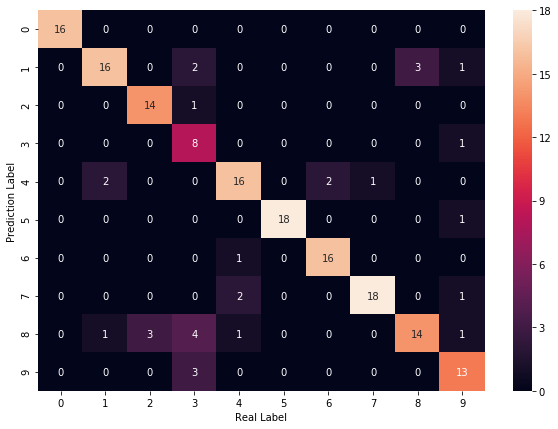

In [19]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [20]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [21]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [22]:
np.sum(list_P == digits.target[:1617])/1617

0.9604205318491033

In [23]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)

In [24]:
np.mean(winner_fitness)

0.9898733120510371

In [25]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:1051 Total connections::1440
